In [1]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from matplotlib.colors import Colormap
from itertools import combinations
import math
import numpy as np
from matplotlib import ticker

In [2]:
IMAGEFOLDER = "images/02_visualisation/"

In [3]:
def savefigure(figure,name):
    figure.savefig(IMAGEFOLDER+name)

In [4]:
X, Y = load_iris(return_X_y=True)

In [86]:
# X

In [87]:
# Y

In [88]:
# X.shape

In [89]:
# Y.shape

In [5]:
X_0=X[Y==0]
X_1=X[Y==1]
X_2=X[Y==2]

Y_0=Y[Y==0]
Y_1=Y[Y==1]
Y_2=Y[Y==2]

In [6]:
TITLEFONT = 20
LABELFONT = 20
LEGENDFONT = 15
FIGURESIZE = (20,20)
DOTSIZE = 100

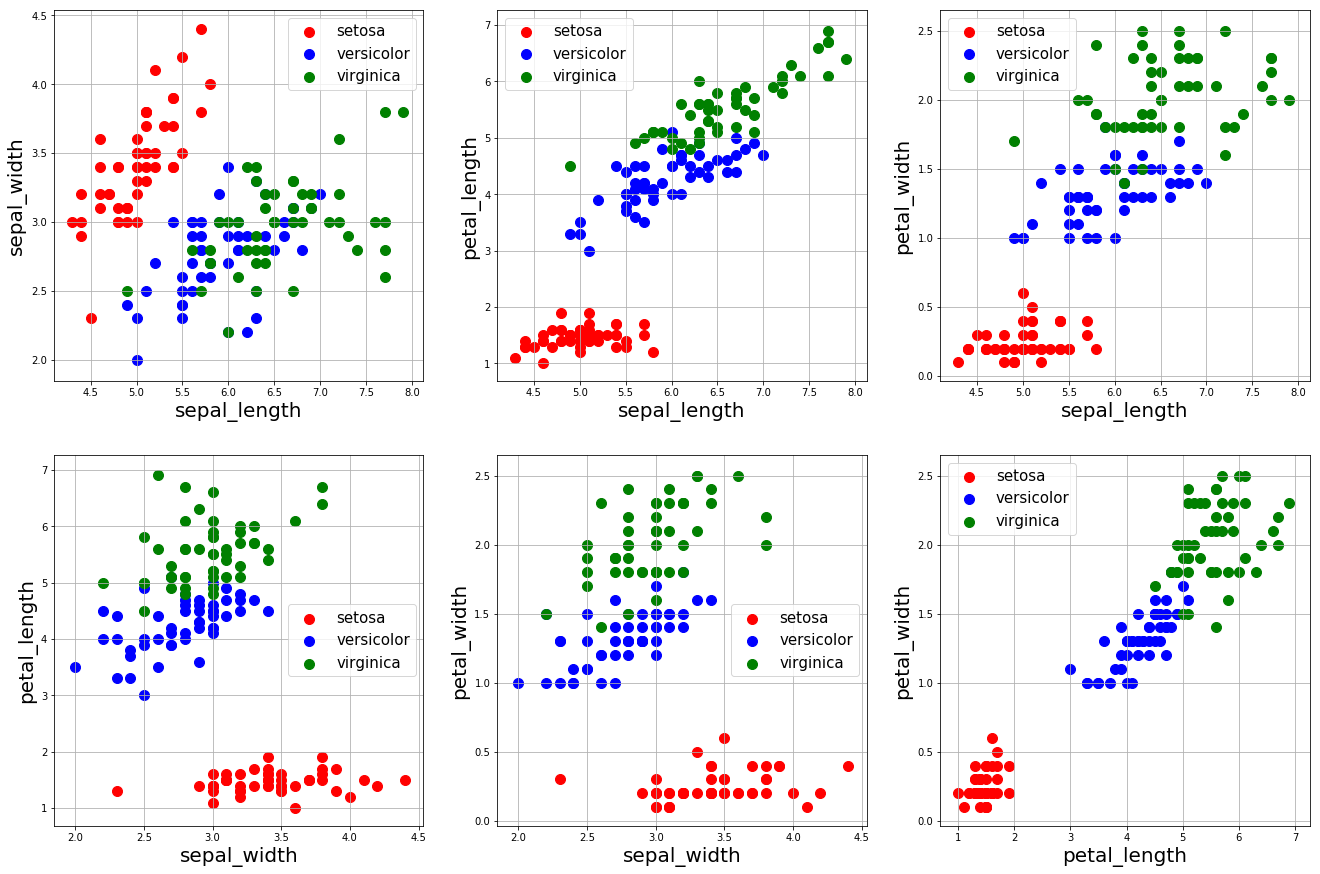

In [95]:
# all features one-on-one

indices = [0,1,2,3]
features = ["sepal_length","sepal_width","petal_length","petal_width"]
indices_combinations = combinations(indices,2)

scale=0.75
fig, axes = plt.subplots(2, 3,figsize=(30*scale,20*scale))
axes_list = list(axes[0])+list(axes[1])

for (a,b),ax in zip(indices_combinations,axes_list):

    
    for horiz, vert, colour in zip([X_0[:,a],X_1[:,a],X_2[:,a]],[X_0[:,b],X_1[:,b],X_2[:,b]],["red","blue","green"]):
        
        ax.scatter(horiz,vert,c=colour,s=DOTSIZE)
        ax.legend(["setosa","versicolor","virginica"],fontsize=LEGENDFONT)
        ax.set_xlabel(features[a],fontsize=LABELFONT)
        ax.set_ylabel(features[b],fontsize=LABELFONT)
        ax.grid()
        
savefigure(fig,"iris_features.png")

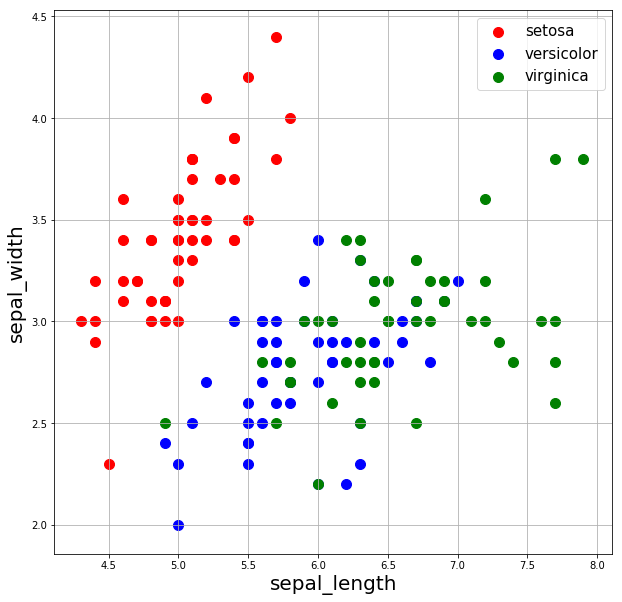

In [7]:
#only one example set of features

features = ["sepal_length","sepal_width","petal_length","petal_width"]

scale=0.75
fig, ax = plt.subplots(1,figsize=(10,10))

a = 0
b = 1

for horiz, vert, colour in zip([X_0[:,a],X_1[:,a],X_2[:,a]],[X_0[:,b],X_1[:,b],X_2[:,b]],["red","blue","green"]):
        
        ax.scatter(horiz,vert,c=colour,s=DOTSIZE)
        ax.legend(["setosa","versicolor","virginica"],fontsize=LEGENDFONT)
        ax.set_xlabel(features[a],fontsize=LABELFONT)
        ax.set_ylabel(features[b],fontsize=LABELFONT)
        ax.grid()
        
savefigure(fig,"iris_features_example_non_linear.png")

In [106]:
# sigmoid function

def sigmoid(x):
    return 1/(1+np.exp(-x))

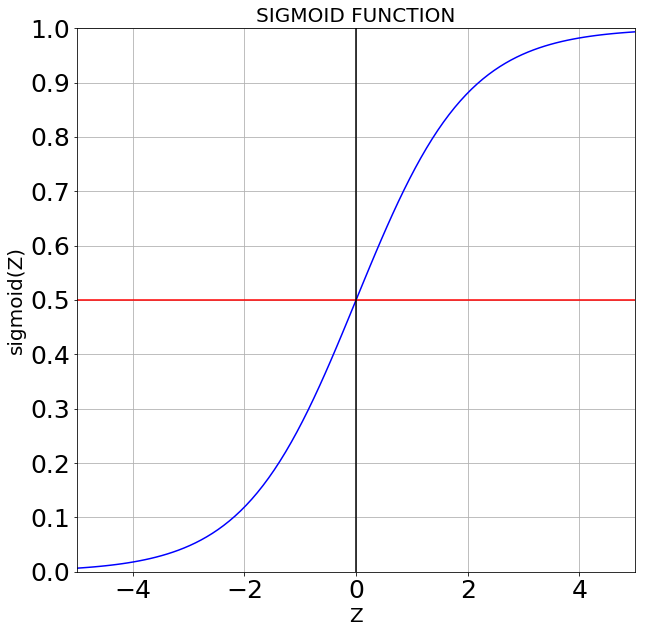

In [144]:
# sigmoid function



fig, ax = plt.subplots(1,figsize=(10,10))

x = np.linspace(-5,5,100)
y = sigmoid(x)

ax.plot(x,y,'b',x,[0.5]*len(x),'r',[0,0],[0,1],'k')
ax.grid()
plt.title("SIGMOID FUNCTION",fontsize=TITLEFONT)
ax.set_xlabel("Z", fontsize=LABELFONT)
ax.set_ylabel("sigmoid(Z)", fontsize=LABELFONT)
ax.axis(xmin=x[0],xmax=x[len(x)-1],ymin=0,ymax=1)
# ax.grid(color="black")
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.tick_params(axis='both', which='major', labelsize=25)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(500))

savefigure(fig,"sigmoid")

In [52]:
# dummy data, non-linear decision boundary


X_centers = np.array([2,2,7,5,5])*1.1
Y_centers = np.array([3,6,4.5,5,3])*1.1

sigma = 0.75

X_arrays_all = [sigma*np.random.randn(70)+X_center for X_center in X_centers]
Y_arrays_all = [sigma*np.random.randn(70)+Y_center for Y_center in Y_centers]

X_arrays = [np.concatenate(X_arrays_all[0:len(X_centers)-2]),X_arrays_all[len(X_centers)-2], X_arrays_all[len(X_centers)-1]]
Y_arrays = [np.concatenate(Y_arrays_all[0:len(X_centers)-2]),Y_arrays_all[len(X_centers)-2], Y_arrays_all[len(X_centers)-1]]

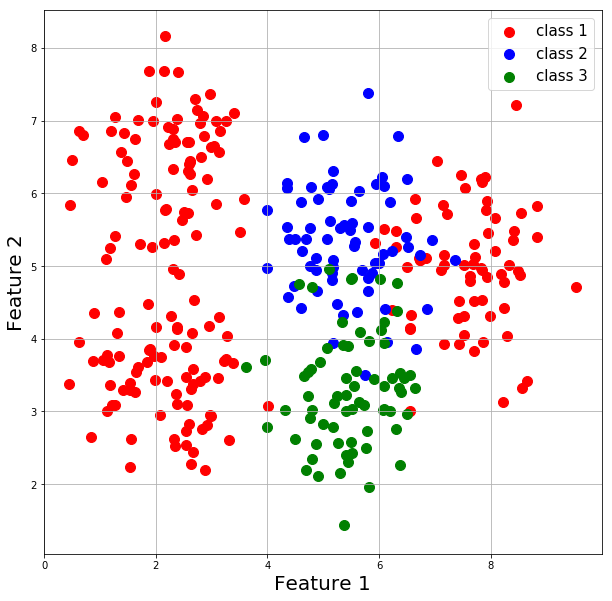

In [53]:
scale=0.75
fig, ax = plt.subplots(1,figsize=(10,10))

for horiz, vert, colour in zip(X_arrays, Y_arrays,["red","blue","green"]):
        
        ax.scatter(horiz,vert,c=colour,s=DOTSIZE)
        ax.legend(["class 1","class 2","class 3"],fontsize=LEGENDFONT)
        ax.set_xlabel("Feature 1",fontsize=LABELFONT)
        ax.set_ylabel("Feature 2",fontsize=LABELFONT)
        ax.grid()
        
savefigure(fig,"non_linear_classification")